In [3]:
import requests
import json
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize

In [12]:
#request function
#turns the json received into a dataframe and returns it and the request
def make_api_call(url, key):
    req = requests.get(str(url) + str(key))

    with open('output.json', 'w') as out:
        json.dump(req.json(), out, sort_keys=True, indent='\t')
        
    ret_df = json_normalize(req.json())
    
    return ret_df, req

In [58]:
#explanation on how to use the opendota api:
#OPENDOTA API: https://docs.opendota.com/#tag/matches%2Fpaths%2F~1matches~1%7Bmatch_id%7D%2Fget
PLAYER_ID = XXXXXXXX
df,r = make_api_call("https://api.opendota.com/api/players/%d/matches" % (PLAYER_ID),"")
df.head()

,assists,deaths,duration,game_mode,hero_id,kills,leaver_status,lobby_type,match_id,party_size,player_slot,radiant_win,skill,start_time,version
0,14,6,1838,22,104,10,0,0,5839972354,1.0,4,True,3.0,1613521431,21.0
1,16,6,2735,22,42,9,0,0,5836692687,1.0,2,True,3.0,1613383417,21.0
2,3,3,2078,22,1,5,0,0,5836626065,1.0,132,True,3.0,1613380736,21.0
3,13,4,3731,22,94,11,0,0,5836507960,1.0,130,False,3.0,1613376321,21.0
4,23,2,2864,22,94,4,0,0,5836413946,1.0,132,False,3.0,1613372848,21.0


In [61]:
df.to_json(r'C:\Users\me\Documents\dota 2 project\match_history.json')

In [1]:
MATCH_ID= XXXXXXXXXX
matchDf,r = make_api_call("https://api.opendota.com/api/matches/%d" % (MATCH_ID),"")

In [2]:
matchDf.to_json(r'C:\Users\me\Documents\dota 2 project\matchDf.json')

In [68]:
#get the array of denies of player 3

#check to see how many players there are in this match
print(len(list(matchDf.players[0])))

#check all the keys of the player dictionary
matchDf.players[0][0].keys()
matchDf.players[0]
matchDf.players[0][2]['xp_per_min']

10


781

In [70]:
print(matchDf.info())
print(matchDf.shape)
matchDf.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 194 entries, all_word_counts.album to version
dtypes: bool(1), int64(181), object(12)
memory usage: 1.6+ KB
None
(1, 194)


all_word_counts.album         int64
all_word_counts.alina         int64
all_word_counts.all           int64
all_word_counts.anus          int64
all_word_counts.are           int64
all_word_counts.ass           int64
all_word_counts.away          int64
all_word_counts.awh           int64
all_word_counts.back          int64
all_word_counts.bnigus        int64
all_word_counts.come          int64
all_word_counts.creep         int64
all_word_counts.did           int64
all_word_counts.didnt         int64
all_word_counts.dont          int64
all_word_counts.each          int64
all_word_counts.easy          int64
all_word_counts.eat           int64
all_word_counts.faerie        int64
all_word_counts.fans          int64
all_word_counts.fire          int64
all_word_counts.followers     int64
all_word_counts.for           int64
all_word_counts.friends       int64
all_word_counts.from          int64
all_word_counts.fuck          int64
all_word_counts.get           int64
all_word_counts.gg          

In [72]:
df.apply(lambda x: sum(x.isnull()),axis=0)
#note that there are no null match_ids

assists             0
deaths              0
duration            0
game_mode           0
hero_id             0
kills               0
leaver_status       0
lobby_type          0
match_id            0
party_size       3111
player_slot         0
radiant_win         0
skill            1871
start_time          0
version          3236
dtype: int64

In [73]:
#checking an older match to see difference in the fields stored
MATCH_ID= XXXXXXXXXX
matchDfOld,r = make_api_call("https://api.opendota.com/api/matches/%d" % (MATCH_ID),"")
list(matchDfOld.columns.values)

['barracks_status_dire',
 'barracks_status_radiant',
 'chat',
 'cluster',
 'cosmetics',
 'dire_score',
 'dire_team_id',
 'draft_timings',
 'duration',
 'engine',
 'first_blood_time',
 'game_mode',
 'human_players',
 'leagueid',
 'lobby_type',
 'match_id',
 'match_seq_num',
 'negative_votes',
 'objectives',
 'patch',
 'picks_bans',
 'players',
 'positive_votes',
 'radiant_gold_adv',
 'radiant_score',
 'radiant_team_id',
 'radiant_win',
 'radiant_xp_adv',
 'region',
 'skill',
 'start_time',
 'teamfights',
 'tower_status_dire',
 'tower_status_radiant',
 'version']

In [74]:
#taking the intersection of old and new match history columns
old = matchDfOld.columns.values
recent = [x for x in matchDf.columns.values if "all_word_counts" not in x and "cosmetics" not in x]

#observe what fields are different
difference = (list(list(set(recent)-set(old)) + list(set(old)-set(recent))))

intersection = list(set(recent) & set(old))

fields_to_remove = list(set(intersection) & set(df.columns.values))

fields_to_add = [y for y in intersection if y not in fields_to_remove]

fields_to_add




['leagueid',
 'patch',
 'chat',
 'objectives',
 'tower_status_radiant',
 'negative_votes',
 'barracks_status_dire',
 'tower_status_dire',
 'engine',
 'players',
 'radiant_xp_adv',
 'dire_score',
 'dire_team_id',
 'first_blood_time',
 'radiant_team_id',
 'region',
 'teamfights',
 'picks_bans',
 'barracks_status_radiant',
 'radiant_gold_adv',
 'cluster',
 'radiant_score',
 'draft_timings',
 'match_seq_num',
 'positive_votes',
 'human_players']

In [75]:
#prepare the df to consolidate
full_df = df.copy()
for field in fields_to_add:
    full_df[field] = 0
    full_df[field] = full_df[field].astype(str(matchDf.dtypes[field]))

In [76]:
#consolidate all data into one dataframe
#make a request for each match
url_root = "https://api.opendota.com/api/matches/"
index = 0

  
for match_id in full_df['match_id']:
    new_matchDf, r = make_api_call(url_root, match_id)
    print("got " + str(match_id) + " index at " + str(index))
    
    #if there is an error then wait and try again
    while len(new_matchDf.columns) < 2:
        print("an error occured, waiting 70 seconds...")
        time.sleep(70)
        
        new_matchDf, r = make_api_call(url_root, match_id)
            
   
    for field in fields_to_add:
        full_df.at[index, field]= new_matchDf[field][0]
    index = index + 1
    
    #wait 1 minute every 42 api calls to avoid rate limits
    if index%42 == 0:
        print("waiting 1 minute...")
        time.sleep(60)
        

got 5839972354 index at 0
got 5836692687 index at 1
got 5836626065 index at 2
got 5836507960 index at 3
got 5836413946 index at 4
got 5835036669 index at 5
got 5834911135 index at 6
got 5834075244 index at 7
got 5834031277 index at 8
got 5833995533 index at 9
got 5833879119 index at 10
got 5833786956 index at 11
got 5833543144 index at 12
got 5832908532 index at 13
got 5832687249 index at 14
got 5832603228 index at 15
got 5832515901 index at 16
got 5830561881 index at 17
got 5830211385 index at 18
got 5828729565 index at 19
got 5828409141 index at 20
got 5828344207 index at 21
got 5828306056 index at 22
got 5826860461 index at 23
got 5826796958 index at 24
got 5826710926 index at 25
got 5826455908 index at 26
got 5826269840 index at 27
got 5825072680 index at 28
got 5824861995 index at 29
got 5824683162 index at 30
got 5822959351 index at 31
got 5822916030 index at 32
got 5822873789 index at 33
got 5821311046 index at 34
got 5821280241 index at 35
got 5819856683 index at 36
got 5819802

got 5657064614 index at 293
waiting 1 minute...
got 5657040786 index at 294
got 5657009739 index at 295
got 5655803987 index at 296
got 5655781204 index at 297
got 5654569874 index at 298
got 5654548097 index at 299
got 5654527270 index at 300
got 5653189403 index at 301
got 5653104912 index at 302
got 5651925644 index at 303
got 5651890653 index at 304
got 5651858021 index at 305
got 5651817935 index at 306
got 5651791990 index at 307
got 5651771562 index at 308
got 5651733123 index at 309
got 5649053934 index at 310
got 5647633932 index at 311
got 5647561060 index at 312
got 5647517815 index at 313
got 5647358138 index at 314
got 5647295555 index at 315
got 5644870175 index at 316
got 5644843182 index at 317
got 5643486875 index at 318
got 5643464020 index at 319
got 5642079760 index at 320
got 5642036593 index at 321
got 5642003030 index at 322
got 5639035833 index at 323
got 5639014945 index at 324
got 5638975178 index at 325
got 5638676487 index at 326
got 5638410005 index at 327


got 5293353066 index at 581
got 5293083848 index at 582
got 5293022247 index at 583
got 5292977865 index at 584
got 5291347795 index at 585
got 5291275921 index at 586
got 5291224186 index at 587
waiting 1 minute...
got 5291144104 index at 588
got 5291105669 index at 589
got 5291065035 index at 590
got 5291005632 index at 591
got 5290961655 index at 592
got 5289582493 index at 593
got 5289513190 index at 594
got 5289452800 index at 595
got 5289399492 index at 596
got 5289363524 index at 597
got 5289291508 index at 598
got 5289259518 index at 599
got 5289188435 index at 600
got 5289153441 index at 601
got 5289120499 index at 602
got 5287786304 index at 603
got 5287747124 index at 604
got 5287694661 index at 605
got 5287666808 index at 606
got 5287630323 index at 607
got 5287597592 index at 608
got 5287472057 index at 609
got 5287442844 index at 610
got 5286287072 index at 611
got 5286232311 index at 612
got 5286184564 index at 613
got 5286142051 index at 614
got 5286091372 index at 615


got 5105131232 index at 869
got 5104963144 index at 870
got 5104934835 index at 871
got 5104885530 index at 872
got 5104831609 index at 873
got 5104781675 index at 874
got 5103931527 index at 875
got 5103892588 index at 876
got 5101205303 index at 877
got 5101178129 index at 878
got 5101152338 index at 879
got 5098716220 index at 880
got 5098385058 index at 881
waiting 1 minute...
got 5098336666 index at 882
got 5098294352 index at 883
got 5097187175 index at 884
got 5097004175 index at 885
got 5097002538 index at 886
got 5096970866 index at 887
got 5096860307 index at 888
got 5096820052 index at 889
got 5096746059 index at 890
got 5095566542 index at 891
got 5095529019 index at 892
got 5095490086 index at 893
got 5095373932 index at 894
got 5095350635 index at 895
got 5095255364 index at 896
got 5095202046 index at 897
got 5095160560 index at 898
got 5094176526 index at 899
got 5094139663 index at 900
got 5093839981 index at 901
got 5093729527 index at 902
got 5093683263 index at 903


got 4876386456 index at 1152
got 4873965852 index at 1153
got 4873910619 index at 1154
got 4873843914 index at 1155
got 4873791183 index at 1156
got 4871705949 index at 1157
got 4871541427 index at 1158
got 4871462586 index at 1159
got 4871421925 index at 1160
got 4869487199 index at 1161
got 4869420487 index at 1162
got 4865064850 index at 1163
got 4858836742 index at 1164
got 4858761247 index at 1165
got 4858695329 index at 1166
got 4856497737 index at 1167
got 4856438055 index at 1168
got 4856358987 index at 1169
got 4856321903 index at 1170
got 4856276486 index at 1171
got 4854316310 index at 1172
got 4851789905 index at 1173
got 4851743169 index at 1174
got 4851701795 index at 1175
waiting 1 minute...
got 4847496038 index at 1176
got 4847423655 index at 1177
got 4847285896 index at 1178
got 4847243180 index at 1179
got 4847139632 index at 1180
got 4847084438 index at 1181
got 4847015619 index at 1182
got 4845170198 index at 1183
got 4845078707 index at 1184
got 4845032610 index at

got 4403780851 index at 1430
got 4403679480 index at 1431
got 4403633188 index at 1432
got 4403584332 index at 1433
got 4403540971 index at 1434
got 4400917076 index at 1435
got 4400825856 index at 1436
got 4400757338 index at 1437
got 4400695279 index at 1438
got 4400619084 index at 1439
got 4400567652 index at 1440
got 4400511938 index at 1441
got 4397802390 index at 1442
got 4397733345 index at 1443
got 4397652090 index at 1444
got 4397610621 index at 1445
got 4397549747 index at 1446
got 4397516461 index at 1447
got 4392011799 index at 1448
got 4391925098 index at 1449
got 4391856600 index at 1450
got 4391791070 index at 1451
got 4389027467 index at 1452
got 4388908342 index at 1453
got 4388806290 index at 1454
got 4388754891 index at 1455
got 4388711241 index at 1456
got 4388673378 index at 1457
got 4385565582 index at 1458
got 4385477882 index at 1459
got 4385388569 index at 1460
got 4385317625 index at 1461
got 4385246434 index at 1462
got 4382437562 index at 1463
got 4382373761

got 4223237674 index at 1709
got 4223205276 index at 1710
got 4223044803 index at 1711
got 4220245274 index at 1712
got 4214031705 index at 1713
got 4213980189 index at 1714
got 4213925657 index at 1715
got 4212017891 index at 1716
got 4211991357 index at 1717
got 4211892534 index at 1718
got 4210442417 index at 1719
got 4210406204 index at 1720
got 4202467575 index at 1721
waiting 1 minute...
got 4202414220 index at 1722
got 4202375613 index at 1723
got 4202081674 index at 1724
got 4200484207 index at 1725
got 4200288689 index at 1726
got 4197149395 index at 1727
got 4197057281 index at 1728
got 4197031926 index at 1729
got 4192525090 index at 1730
got 4192365361 index at 1731
got 4192330560 index at 1732
got 4190674889 index at 1733
got 4190632527 index at 1734
got 4190578364 index at 1735
got 4186660926 index at 1736
got 4185286759 index at 1737
got 4180720801 index at 1738
got 4180700736 index at 1739
got 4179027075 index at 1740
got 4178870902 index at 1741
got 4175276779 index at

got 4006164622 index at 1987
got 4005944888 index at 1988
got 4005893842 index at 1989
got 4004183713 index at 1990
got 4004128731 index at 1991
got 4002838628 index at 1992
got 4002791654 index at 1993
got 4002726655 index at 1994
got 4001163181 index at 1995
got 4001121706 index at 1996
got 4001087317 index at 1997
got 4000870432 index at 1998
got 4000798127 index at 1999
got 4000767912 index at 2000
got 4000704867 index at 2001
got 3997849410 index at 2002
got 3997815593 index at 2003
got 3997778071 index at 2004
got 3997624831 index at 2005
got 3997572072 index at 2006
got 3996257220 index at 2007
got 3996199473 index at 2008
got 3996154983 index at 2009
got 3994332824 index at 2010
got 3994288854 index at 2011
got 3994084360 index at 2012
got 3993881155 index at 2013
got 3992536026 index at 2014
got 3992487943 index at 2015
waiting 1 minute...
got 3992442070 index at 2016
got 3992117174 index at 2017
got 3992056569 index at 2018
got 3990887837 index at 2019
got 3990855411 index at

got 3831116678 index at 2266
got 3828354019 index at 2267
waiting 1 minute...
got 3826742763 index at 2268
got 3826713300 index at 2269
got 3823668253 index at 2270
got 3823639642 index at 2271
got 3823296435 index at 2272
got 3821922526 index at 2273
got 3821866530 index at 2274
got 3820033406 index at 2275
got 3820006638 index at 2276
got 3819948250 index at 2277
got 3819772354 index at 2278
got 3819729887 index at 2279
got 3819657270 index at 2280
got 3819606334 index at 2281
got 3818057160 index at 2282
got 3817966226 index at 2283
got 3817886825 index at 2284
got 3815078841 index at 2285
got 3815011291 index at 2286
got 3814977174 index at 2287
got 3814877701 index at 2288
got 3813683133 index at 2289
got 3813653545 index at 2290
got 3813629391 index at 2291
got 3811885463 index at 2292
got 3810283793 index at 2293
got 3810233070 index at 2294
got 3809805575 index at 2295
got 3809674239 index at 2296
got 3809591789 index at 2297
got 3809493949 index at 2298
got 3806619096 index at

got 3686767594 index at 2544
got 3686738630 index at 2545
got 3681457110 index at 2546
got 3680053131 index at 2547
got 3680021225 index at 2548
got 3679980462 index at 2549
got 3679596118 index at 2550
got 3679546670 index at 2551
got 3678039106 index at 2552
got 3677980687 index at 2553
got 3677801091 index at 2554
got 3677769070 index at 2555
got 3677719792 index at 2556
got 3675856246 index at 2557
got 3675812426 index at 2558
got 3675757776 index at 2559
got 3675576286 index at 2560
got 3675500162 index at 2561
waiting 1 minute...
got 3673913894 index at 2562
got 3673884658 index at 2563
got 3673846435 index at 2564
got 3673818164 index at 2565
got 3673770984 index at 2566
got 3672191018 index at 2567
got 3672162567 index at 2568
got 3672127139 index at 2569
got 3672083432 index at 2570
got 3671897856 index at 2571
got 3671830008 index at 2572
got 3670653603 index at 2573
got 3670620311 index at 2574
got 3670580813 index at 2575
got 3670446781 index at 2576
got 3670408533 index at

got 3324014070 index at 2822
got 3323972702 index at 2823
got 3323796111 index at 2824
got 3323728745 index at 2825
got 3322318804 index at 2826
got 3322250800 index at 2827
got 3322067764 index at 2828
got 3321994452 index at 2829
got 3321922517 index at 2830
got 3320275130 index at 2831
got 3320231395 index at 2832
got 3320137834 index at 2833
got 3318374309 index at 2834
got 3318329563 index at 2835
got 3317931329 index at 2836
got 3316154134 index at 2837
got 3316076343 index at 2838
got 3315706159 index at 2839
got 3315639349 index at 2840
got 3311859360 index at 2841
got 3311824228 index at 2842
got 3311799876 index at 2843
got 3311661226 index at 2844
got 3311612474 index at 2845
got 3311402054 index at 2846
got 3309990850 index at 2847
got 3309934405 index at 2848
got 3309688193 index at 2849
got 3308048975 index at 2850
got 3308015408 index at 2851
got 3307977444 index at 2852
got 3307842410 index at 2853
got 3307803244 index at 2854
got 3306194134 index at 2855
waiting 1 minu

got 3118719825 index at 3101
got 3118359122 index at 3102
got 3117890218 index at 3103
got 3116718726 index at 3104
got 3116668884 index at 3105
got 3116345204 index at 3106
got 3116023367 index at 3107
waiting 1 minute...
got 3114706288 index at 3108
got 3114503668 index at 3109
got 3114258669 index at 3110
got 3112950982 index at 3111
got 3112910254 index at 3112
got 3112834905 index at 3113
got 3112696014 index at 3114
got 3111083853 index at 3115
got 3111017419 index at 3116
got 3110568455 index at 3117
got 3110405985 index at 3118
got 3109199538 index at 3119
got 3109119863 index at 3120
got 3109079407 index at 3121
got 3108877807 index at 3122
got 3108814074 index at 3123
got 3108687153 index at 3124
got 3108574588 index at 3125
got 3107045279 index at 3126
got 3106988033 index at 3127
got 3106724776 index at 3128
got 3106564094 index at 3129
got 3106344443 index at 3130
got 3106232660 index at 3131
got 3104696157 index at 3132
got 3104640121 index at 3133
got 3104467942 index at

got 2439002049 index at 3378
got 2436689954 index at 3379
got 2434584456 index at 3380
got 2434021899 index at 3381
got 2401878747 index at 3382
got 2401792401 index at 3383
got 2401240004 index at 3384
got 2401171079 index at 3385
got 2399353784 index at 3386
got 2399310348 index at 3387
got 2396794950 index at 3388
got 2396760708 index at 3389
got 2394035486 index at 3390
got 2393970397 index at 3391
got 2391576916 index at 3392
got 2387108162 index at 3393
got 2386990120 index at 3394
got 2384798547 index at 3395
got 2382643087 index at 3396
got 2382506483 index at 3397
got 2382453088 index at 3398
got 2382398215 index at 3399
got 2380175504 index at 3400
got 2380077488 index at 3401
waiting 1 minute...
got 2380017263 index at 3402
got 2379840342 index at 3403
got 2379786014 index at 3404
got 2379682378 index at 3405
got 2379046854 index at 3406
got 2377326167 index at 3407
got 2377254596 index at 3408
got 2377048013 index at 3409
got 2376986939 index at 3410
got 2376899977 index at

got 1749462774 index at 3656
got 1749403509 index at 3657
got 1749364631 index at 3658
got 1749048372 index at 3659
got 1748970802 index at 3660
got 1747105714 index at 3661
got 1747063737 index at 3662
got 1746471705 index at 3663
got 1746308350 index at 3664
got 1746217176 index at 3665
got 1744537945 index at 3666
got 1743654429 index at 3667
got 1743500730 index at 3668
got 1741899335 index at 3669
got 1741708379 index at 3670
got 1739303558 index at 3671
got 1739237264 index at 3672
got 1739157044 index at 3673
got 1738861502 index at 3674
got 1738672668 index at 3675
got 1738464129 index at 3676
got 1736310079 index at 3677
got 1736268812 index at 3678
got 1735671343 index at 3679
got 1735555351 index at 3680
got 1735430106 index at 3681
got 1733535290 index at 3682
got 1733253611 index at 3683
got 1733214322 index at 3684
got 1732889830 index at 3685
got 1732777412 index at 3686
got 1732632095 index at 3687
got 1732493098 index at 3688
got 1730818860 index at 3689
got 1730754806

got 1506340208 index at 3935
got 1506270004 index at 3936
got 1504145456 index at 3937
got 1503888436 index at 3938
got 1503809421 index at 3939
got 1501821359 index at 3940
got 1501550736 index at 3941
got 1501340209 index at 3942
got 1501203026 index at 3943
got 1499573200 index at 3944
got 1499532330 index at 3945
got 1499416022 index at 3946
got 1499309290 index at 3947
waiting 1 minute...
got 1496660729 index at 3948
got 1496489374 index at 3949
got 1496418478 index at 3950
got 1493736736 index at 3951
got 1493662706 index at 3952
got 1491224516 index at 3953
got 1491161062 index at 3954
got 1488746612 index at 3955
got 1488671508 index at 3956
got 1488587602 index at 3957
got 1488478690 index at 3958
got 1484148815 index at 3959
got 1484092066 index at 3960
got 1476320025 index at 3961
got 1476234853 index at 3962
got 1476015352 index at 3963
got 1475932376 index at 3964
got 1473568907 index at 3965
got 1473541918 index at 3966
got 1473333494 index at 3967
got 1471264776 index at

got 1335100277 index at 4213
got 1334998439 index at 4214
got 1332678827 index at 4215
got 1332662574 index at 4216
got 1332605917 index at 4217
got 1330365556 index at 4218
got 1330313356 index at 4219
got 1330241414 index at 4220
got 1328238799 index at 4221
got 1328210549 index at 4222
got 1327918096 index at 4223
got 1327819330 index at 4224
got 1327657703 index at 4225
got 1325625896 index at 4226
got 1323649625 index at 4227
got 1323546972 index at 4228
got 1323503893 index at 4229
got 1323451258 index at 4230
got 1323398926 index at 4231
got 1320937138 index at 4232
got 1320864475 index at 4233
got 1320734600 index at 4234
got 1320540358 index at 4235
got 1320015424 index at 4236
got 1319854891 index at 4237
got 1317948673 index at 4238
got 1317881507 index at 4239
got 1317783801 index at 4240
got 1317497491 index at 4241
waiting 1 minute...
got 1315291879 index at 4242
got 1315176476 index at 4243
got 1315096123 index at 4244
got 1315071585 index at 4245
got 1312909107 index at

got 1128577855 index at 4492
got 1128405418 index at 4493
waiting 1 minute...
got 1128211598 index at 4494
got 1128112869 index at 4495
got 1126481529 index at 4496
got 1126251130 index at 4497
got 1126196184 index at 4498
got 1125889829 index at 4499
got 1125805441 index at 4500
got 1125680848 index at 4501
got 1124035874 index at 4502
got 1123934168 index at 4503
got 1123883828 index at 4504
got 1123806161 index at 4505
got 1123732169 index at 4506
got 1123678226 index at 4507
got 1123548354 index at 4508
got 1123481961 index at 4509
got 1123360198 index at 4510
got 1121501186 index at 4511
got 1121441829 index at 4512
got 1121419612 index at 4513
got 1121380599 index at 4514
got 1121331077 index at 4515
got 1121283720 index at 4516
got 1121251278 index at 4517
got 1121175602 index at 4518
got 1121097541 index at 4519
got 1120897577 index at 4520
got 1120791782 index at 4521
got 1120696172 index at 4522
got 1118909136 index at 4523
got 1118728313 index at 4524
got 1118693421 index at

In [77]:
full_df.to_json(r'C:\Users\me\Documents\dota 2 project\full_match_history4.json')
full_df.head()

,assists,deaths,duration,game_mode,hero_id,kills,leaver_status,lobby_type,match_id,party_size,...,teamfights,picks_bans,barracks_status_radiant,radiant_gold_adv,cluster,radiant_score,draft_timings,match_seq_num,positive_votes,human_players
0,14,6,1838,22,104,10,0,0,5839972354,1.0,...,"[{'start': 398, 'end': 442, 'last_death': 427,...","[{'is_pick': True, 'hero_id': 35, 'team': 0, '...",63,"[100, 89, 684, 257, 244, 484, 399, 709, 1544, ...",121,39,"[{'order': 1, 'pick': False, 'active_team': 2,...",4914746975,0,10
1,16,6,2735,22,42,9,0,0,5836692687,1.0,...,"[{'start': 419, 'end': 453, 'last_death': 438,...","[{'is_pick': True, 'hero_id': 26, 'team': 1, '...",63,"[0, 13, 379, 676, 988, 649, 915, 1439, 1858, 1...",121,40,"[{'order': 1, 'pick': False, 'active_team': 2,...",4912872674,0,10
2,3,3,2078,22,1,5,0,0,5836626065,1.0,...,"[{'start': 375, 'end': 413, 'last_death': 398,...","[{'is_pick': True, 'hero_id': 110, 'team': 0, ...",63,"[0, 75, -360, -984, -847, -581, 187, 73, 297, ...",122,44,"[{'order': 1, 'pick': False, 'active_team': 2,...",4912830333,0,10
3,13,4,3731,22,94,11,0,0,5836507960,1.0,...,"[{'start': 709, 'end': 750, 'last_death': 735,...","[{'is_pick': True, 'hero_id': 111, 'team': 0, ...",0,"[0, 549, 632, -138, -629, -381, -347, -290, -6...",121,49,"[{'order': 1, 'pick': False, 'active_team': 2,...",4912795158,0,10
4,23,2,2864,22,94,4,0,0,5836413946,1.0,...,"[{'start': 259, 'end': 307, 'last_death': 292,...","[{'is_pick': True, 'hero_id': 29, 'team': 1, '...",48,"[0, 300, 274, 1052, 1439, 2314, 2993, 3154, 29...",122,42,"[{'order': 1, 'pick': False, 'active_team': 2,...",4912740872,0,10


In [78]:
full_df.dtypes

assists                      int64
deaths                       int64
duration                     int64
game_mode                    int64
hero_id                      int64
kills                        int64
leaver_status                int64
lobby_type                   int64
match_id                     int64
party_size                 float64
player_slot                  int64
radiant_win                   bool
skill                      float64
start_time                   int64
version                    float64
leagueid                     int64
patch                        int64
chat                        object
objectives                  object
tower_status_radiant         int64
negative_votes               int64
barracks_status_dire         int64
tower_status_dire            int64
engine                       int64
players                     object
radiant_xp_adv              object
dire_score                   int64
dire_team_id                object
first_blood_time    

In [79]:
full_df.apply(lambda x: sum(x.isnull()),axis=0)

assists                       0
deaths                        0
duration                      0
game_mode                     0
hero_id                       0
kills                         0
leaver_status                 0
lobby_type                    0
match_id                      0
party_size                 3111
player_slot                   0
radiant_win                   0
skill                      1871
start_time                    0
version                    3236
leagueid                      0
patch                         0
chat                       3174
objectives                 3175
tower_status_radiant          0
negative_votes                0
barracks_status_dire          0
tower_status_dire             0
engine                        0
players                       0
radiant_xp_adv             3175
dire_score                    0
dire_team_id               4227
first_blood_time              0
radiant_team_id            4228
region                        0
teamfigh

In [80]:
full_df.describe()

,assists,deaths,duration,game_mode,hero_id,kills,leaver_status,lobby_type,match_id,party_size,...,engine,dire_score,first_blood_time,region,barracks_status_radiant,cluster,radiant_score,match_seq_num,positive_votes,human_players
count,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4.553000e+03,1442.000000,...,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4.553000e+03,4553.000000,4553.00000
mean,11.010323,6.185592,2464.869317,13.934109,55.413354,10.612783,0.093125,3.008127,3.608699e+09,3.262829,...,0.795519,27.371623,105.523830,2.002855,36.891720,122.141226,27.846475,3.099597e+09,0.027454,9.99978
std,6.242474,3.739137,688.106442,9.731571,37.987667,6.931220,0.432255,3.642369,1.443216e+09,2.968887,...,0.403366,19.997359,89.680123,0.264709,28.897346,2.814263,19.589144,1.188057e+09,0.184867,0.01482
min,0.000000,0.000000,384.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.089853e+09,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,111.000000,0.000000,9.764699e+08,0.000000,9.00000
25%,6.000000,3.000000,1987.000000,2.000000,18.000000,5.000000,0.000000,0.000000,2.374592e+09,1.000000,...,1.000000,7.000000,34.000000,2.000000,0.000000,121.000000,9.000000,2.078882e+09,0.000000,10.00000
50%,10.000000,6.000000,2380.000000,22.000000,48.000000,10.000000,0.000000,0.000000,3.820007e+09,2.000000,...,1.000000,29.000000,93.000000,2.000000,51.000000,122.000000,31.000000,3.317781e+09,0.000000,10.00000
75%,15.000000,8.000000,2863.000000,22.000000,93.000000,15.000000,0.000000,7.000000,4.882564e+09,5.000000,...,1.000000,43.000000,151.000000,2.000000,63.000000,123.000000,43.000000,4.098789e+09,0.000000,10.00000
max,53.000000,26.000000,6824.000000,22.000000,129.000000,47.000000,4.000000,9.000000,5.839972e+09,10.000000,...,1.000000,95.000000,624.000000,10.000000,63.000000,204.000000,91.000000,4.914747e+09,3.000000,10.00000


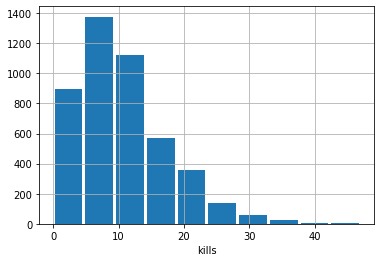

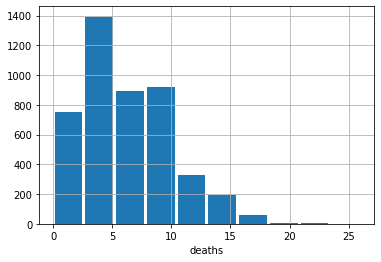

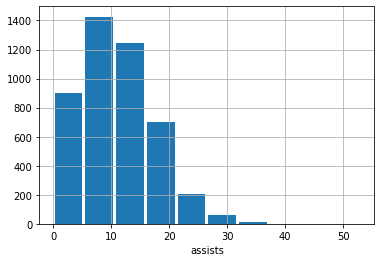

In [81]:
#plot histograms of k,d,a
full_df['kills'].hist(rwidth=0.9, bins=np.histogram_bin_edges(list(full_df['kills'])))
plt.xlabel('kills')
plt.show()
full_df['deaths'].hist(rwidth=0.9, bins=np.histogram_bin_edges(list(full_df['deaths'])))
plt.xlabel('deaths')
plt.show()
full_df['assists'].hist(rwidth=0.9, bins=np.histogram_bin_edges(list(full_df['assists'])))
plt.xlabel('assists')
plt.show()

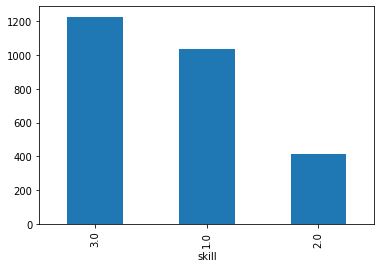

In [82]:
#plot histogram of skill to see which skill bracket has been played in the most
full_df['skill'].value_counts().plot.bar()
plt.xlabel('skill')
plt.show()

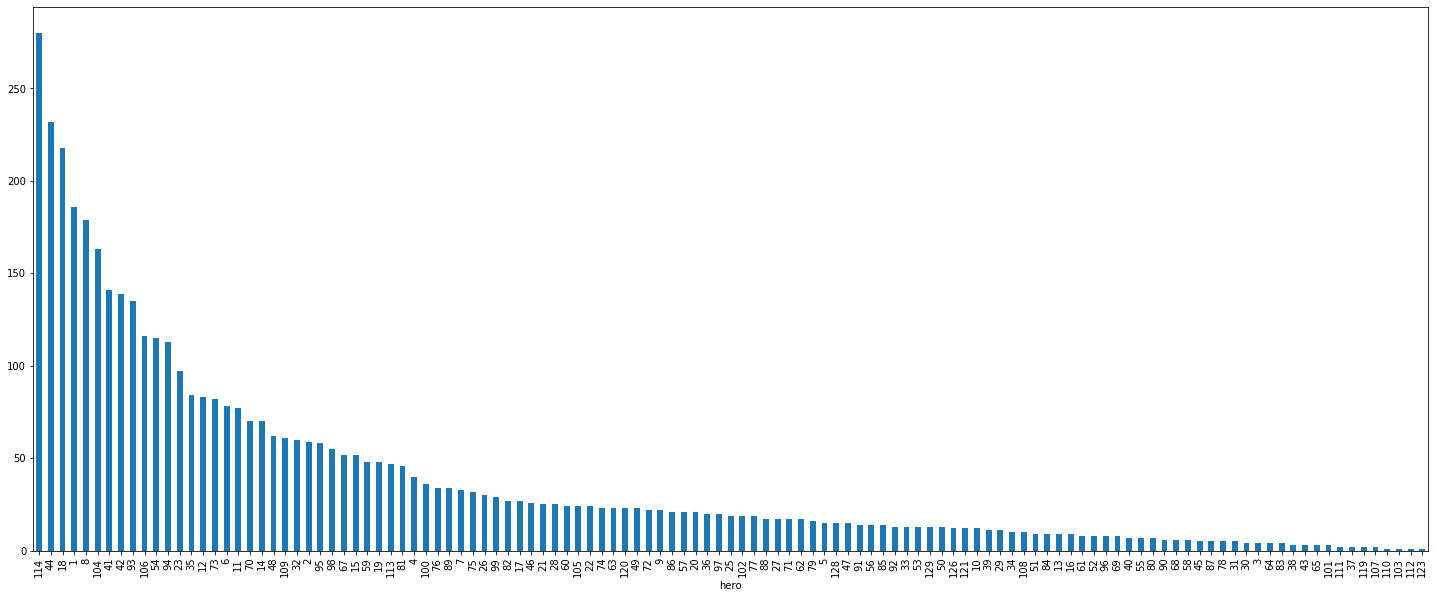

In [83]:
#plot heroes by usage
plt.figure(figsize=(25,10))
full_df['hero_id'].value_counts().plot.bar()
plt.xlabel('hero')
plt.show()

In [84]:
#fields to take from the player object
my_fields_to_add = [
'my_xp_per_min', 
'my_gold_per_min',
'my_last_hits',
'my_denies',
'my_ability_upgrades_arr',
'my_backpack_0',
'my_backpack_1',
'my_backpack_2',
'my_item_0',
'my_item_1',
'my_item_2',
'my_item_3',
'my_item_4',
'my_item_5',
'my_kill_streaks',
'my_total_gold',
'my_camps_stacked',
'my_gold_t',
'my_gold_reasons',
'my_hero_damage',
'my_hero_healing',
'my_lane_pos',
'my_level',
'my_lh_t',
'my_max_hero_hit',
'my_multi_kills',
'my_obs_placed',
'my_sen_placed',
'my_tower_damage',
'my_xp_reasons',
'my_xp_t',
'my_total_xp',
'my_kills_per_min',
'my_lane_efficiency',
'my_lane_role',
'my_is_roaming',
'my_pings',
'my_rune_pickups',
'my_stuns',
'my_isRadiant',
'my_region',
'my_neutral_kills',
'my_tower_kills',
'my_courier_kills',
'my_lane_kills',
'my_observer_kills',
'my_sentry_kills',
'my_roshan_kills',
'my_ancient_kills',
'my_lane',
'my_actions_per_min',
'my_rank_tier',
'my_leaver_status',
'my_permanent_buffs',
'my_gold_spent',
'my_damage_taken',
'my_damage_inflictor_received',
'my_item_uses',
'my_purchase_log',
'my_personaname',
'my_win',
'my_lose',
'my_abandons',
'my_necronomicon_kills',
'my_buyback_count',
'my_observer_uses',
'my_sentry_uses',
'my_purchase_tpscroll',
'my_player_slot']

In [85]:
#prepare the df to consolidate
temp_player = matchDf['players'][0][2]
my_full_df = full_df.copy()
for field in my_fields_to_add:
    my_full_df[field] = 0
    type_str = str(type(temp_player[field[3:]]))[8:-2]
    if type_str == 'list' or type_str == 'dict':
        type_str = 'object'
    my_full_df[field] = my_full_df[field].astype(type_str)

In [86]:
my_full_df.dtypes

assists                           int64
deaths                            int64
duration                          int64
game_mode                         int64
hero_id                           int64
kills                             int64
leaver_status                     int64
lobby_type                        int64
match_id                          int64
party_size                      float64
player_slot                       int64
radiant_win                        bool
skill                           float64
start_time                        int64
version                         float64
leagueid                          int64
patch                             int64
chat                             object
objectives                       object
tower_status_radiant              int64
negative_votes                    int64
barracks_status_dire              int64
tower_status_dire                 int64
engine                            int64
players                          object


In [87]:
#get data from the player dictionaries
my_player_arr = []
index = 0
skip = 0 

for players in my_full_df['players']:
    found = 0
    for i in range(0,9):
        if players[i]['account_id'] == 94219943:
            #print('found')
            found = 1
            my_stats = players[i]
            my_player_arr.append(my_stats)
            
            for field in my_fields_to_add:
                if field[3:] in list(my_stats.keys()):
                    my_full_df.at[index, field] = my_stats[field[3:]]
                else:
                    my_full_df.at[index, field] = None
            
        
    if not found:
        for field in my_fields_to_add:
            my_full_df.at[index, field] = None
        
    index = index + 1     

In [89]:
list(my_stats.keys())
print('xp_per_min' in my_player_arr[0].keys())
my_fields_to_add

True


['my_xp_per_min',
 'my_gold_per_min',
 'my_last_hits',
 'my_denies',
 'my_ability_upgrades_arr',
 'my_backpack_0',
 'my_backpack_1',
 'my_backpack_2',
 'my_item_0',
 'my_item_1',
 'my_item_2',
 'my_item_3',
 'my_item_4',
 'my_item_5',
 'my_kill_streaks',
 'my_total_gold',
 'my_camps_stacked',
 'my_gold_t',
 'my_gold_reasons',
 'my_hero_damage',
 'my_hero_healing',
 'my_lane_pos',
 'my_level',
 'my_lh_t',
 'my_max_hero_hit',
 'my_multi_kills',
 'my_obs_placed',
 'my_sen_placed',
 'my_tower_damage',
 'my_xp_reasons',
 'my_xp_t',
 'my_total_xp',
 'my_kills_per_min',
 'my_lane_efficiency',
 'my_lane_role',
 'my_is_roaming',
 'my_pings',
 'my_rune_pickups',
 'my_stuns',
 'my_isRadiant',
 'my_region',
 'my_neutral_kills',
 'my_tower_kills',
 'my_courier_kills',
 'my_lane_kills',
 'my_observer_kills',
 'my_sentry_kills',
 'my_roshan_kills',
 'my_ancient_kills',
 'my_lane',
 'my_actions_per_min',
 'my_rank_tier',
 'my_leaver_status',
 'my_permanent_buffs',
 'my_gold_spent',
 'my_damage_taken',

In [90]:
print(len(my_player_arr))
my_player_arr[0]['xp_per_min']


4256


668

In [91]:
my_full_df

,assists,deaths,duration,game_mode,hero_id,kills,leaver_status,lobby_type,match_id,party_size,...,my_personaname,my_win,my_lose,my_abandons,my_necronomicon_kills,my_buyback_count,my_observer_uses,my_sentry_uses,my_purchase_tpscroll,my_player_slot
0,14,6,1838,22,104,10,0,0,5839972354,1.0,...,ihsir,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0
1,16,6,2735,22,42,9,0,0,5836692687,1.0,...,ihsir,1.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,2.0
2,3,3,2078,22,1,5,0,0,5836626065,1.0,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,4,3731,22,94,11,0,0,5836507960,1.0,...,ihsir,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,130.0
4,23,2,2864,22,94,4,0,0,5836413946,1.0,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,3,2511,22,113,8,0,0,5835036669,1.0,...,ihsir,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0
6,10,2,2178,22,94,8,0,0,5834911135,1.0,...,ihsir,1.0,0.0,0.0,0.0,0.0,3.0,0.0,NaN,130.0
7,18,6,3893,2,94,12,0,9,5834075244,10.0,...,ihsir,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,128.0
8,2,0,1402,2,41,4,0,9,5834031277,10.0,...,ihsir,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,128.0
9,14,1,1967,2,1,7,0,9,5833995533,10.0,...,ihsir,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [92]:
my_full_df.describe()

,assists,deaths,duration,game_mode,hero_id,kills,leaver_status,lobby_type,match_id,party_size,...,my_gold_spent,my_win,my_lose,my_abandons,my_necronomicon_kills,my_buyback_count,my_observer_uses,my_sentry_uses,my_purchase_tpscroll,my_player_slot
count,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4.553000e+03,1442.000000,...,3903.000000,4256.000000,4256.000000,4256.000000,1281.000000,1281.000000,1281.000000,1281.000000,1238.000000,4256.000000
mean,11.010323,6.185592,2464.869317,13.934109,55.413354,10.612783,0.093125,3.008127,3.608699e+09,3.262829,...,18936.751217,0.536184,0.463816,0.018092,0.110851,0.381733,0.601874,0.167057,5.578352,60.242481
std,6.242474,3.739137,688.106442,9.731571,37.987667,6.931220,0.432255,3.642369,1.443216e+09,2.968887,...,8340.751488,0.498748,0.498748,0.133300,0.955355,0.627702,1.622824,1.120913,2.837259,63.615372
min,0.000000,0.000000,384.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.089853e+09,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,6.000000,3.000000,1987.000000,2.000000,18.000000,5.000000,0.000000,0.000000,2.374592e+09,1.000000,...,12930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
50%,10.000000,6.000000,2380.000000,22.000000,48.000000,10.000000,0.000000,0.000000,3.820007e+09,2.000000,...,18190.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000
75%,15.000000,8.000000,2863.000000,22.000000,93.000000,15.000000,0.000000,7.000000,4.882564e+09,5.000000,...,23582.500000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,129.000000
max,53.000000,26.000000,6824.000000,22.000000,129.000000,47.000000,4.000000,9.000000,5.839972e+09,10.000000,...,61155.000000,1.000000,1.000000,1.000000,20.000000,5.000000,18.000000,29.000000,18.000000,131.000000


In [93]:
my_full_df.to_json(r'C:\Users\me\Documents\dota 2 project\my_full_match_history.json')
my_full_df.head()

,assists,deaths,duration,game_mode,hero_id,kills,leaver_status,lobby_type,match_id,party_size,...,my_personaname,my_win,my_lose,my_abandons,my_necronomicon_kills,my_buyback_count,my_observer_uses,my_sentry_uses,my_purchase_tpscroll,my_player_slot
0,14,6,1838,22,104,10,0,0,5839972354,1.0,...,ihsir,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0
1,16,6,2735,22,42,9,0,0,5836692687,1.0,...,ihsir,1.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,2.0
2,3,3,2078,22,1,5,0,0,5836626065,1.0,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,4,3731,22,94,11,0,0,5836507960,1.0,...,ihsir,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,130.0
4,23,2,2864,22,94,4,0,0,5836413946,1.0,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
#eda function from: https://medium.com/swlh/a-complete-guide-to-exploratory-data-analysis-and-data-cleaning-dd282925320f
def ames_eda(df2): 
    eda_df = {}
    eda_df['null_sum'] = df2.isnull().sum()
    eda_df['null_pct'] = df2.isnull().mean()
    eda_df['dtypes'] = df2.dtypes
    eda_df['count'] = df2.count()
    eda_df['mean'] = df2.mean()
    eda_df['median'] = df2.median()
    eda_df['min'] = df2.min()
    eda_df['max'] = df2.max()
    
    return pd.DataFrame(eda_df)
stat_df= ames_eda(my_full_df)


In [95]:
print(stat_df.sort_values(by=['null_sum'], ascending=False).to_string())
#drop nulls from chat (3171 nulls)

                              null_sum  null_pct   dtypes  count          mean        median         min         max
radiant_team_id                   4228  0.928618   object    325  6.893432e+06  7.169132e+06     2025521     8317709
dire_team_id                      4227  0.928399   object    326  6.865573e+06  7.152152e+06     2025521     8317454
draft_timings                     3427  0.752691   object   1126           NaN           NaN         NaN         NaN
my_permanent_buffs                3414  0.749835   object   1139           NaN           NaN         NaN         NaN
my_purchase_tpscroll              3315  0.728091  float64   1238  5.578352e+00  5.000000e+00           1          18
my_obs_placed                     3296  0.723918  float64   1257  6.658711e-01  0.000000e+00           0          18
my_camps_stacked                  3296  0.723918  float64   1257  4.566428e-01  0.000000e+00           0           7
my_sen_placed                     3296  0.723918  float64   1257

In [96]:
#figure out what data types to change
print(my_full_df.dtypes.to_string())

assists                           int64
deaths                            int64
duration                          int64
game_mode                         int64
hero_id                           int64
kills                             int64
leaver_status                     int64
lobby_type                        int64
match_id                          int64
party_size                      float64
player_slot                       int64
radiant_win                        bool
skill                           float64
start_time                        int64
version                         float64
leagueid                          int64
patch                             int64
chat                             object
objectives                       object
tower_status_radiant              int64
negative_votes                    int64
barracks_status_dire              int64
tower_status_dire                 int64
engine                            int64
players                          object


In [97]:
new_fields_to_add = [
'my_gold_adv',
'my_xp_adv'
'my_gold_at_ten',
'my_max_kill_streaks',
'my_total_kill_streaks',
'my_lh_at_ten',
'my_max_hero_hit_value',
'my_max_multi_kills',
'my_total_multi_kills',
'my_xp_at_ten',
'my_permanent_buffs_stacks',
'my_hero_damage_taken',
'my_total_item_uses'
]

In [98]:
#choose where to cut nulls from
cleaned_df = my_full_df.dropna(subset = ['chat'])

In [99]:
#add new fields for cleaned values
for field in new_fields_to_add:
    cleaned_df[field] = 0
    cleaned_df[field] = cleaned_df[field].astype(int)

C:\Users\me\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\me\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [100]:
#convert bools to ints
for col in list(cleaned_df.columns):
    if str(cleaned_df[col].dtype) == 'bool':
        cleaned_df[col] = cleaned_df[col].astype(int)

C:\Users\me\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [101]:
#add final gold and xp advantages
side_factor = 1
for i in list(cleaned_df.index.values):
    if cleaned_df['radiant_gold_adv'][i] is not None:
        side_factor = 1 if cleaned_df['my_isRadiant'][i] == 1 else -1
        cleaned_df.at[i,'my_gold_adv'] = cleaned_df['radiant_gold_adv'][i][-1] * side_factor
    else:
        cleaned_df.at[i,'my_gold_adv'] = None
        
    if cleaned_df['radiant_xp_adv'][i] is not None:
        side_factor = 1 if cleaned_df['my_isRadiant'][i] == 1 else -1
        cleaned_df.at[i,'my_xp_adv'] = cleaned_df['radiant_xp_adv'][i][-1] * side_factor
    else:
        cleaned_df.at[i,'my_xp_adv'] = None

C:\Users\me\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\me\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [102]:
#get gold, xp, and last hits at 10 minutes in
for i in list(cleaned_df.index.values):
    
    if cleaned_df['my_gold_t'][i] is not None:
        if len(cleaned_df['my_gold_t'][i])>=11:
            cleaned_df.at[i,'my_gold_at_ten'] = cleaned_df['my_gold_t'][i][10]
        else:
            cleaned_df.at[i,'my_gold_at_ten'] = max(cleaned_df['my_gold_t'][i])
    else:
        cleaned_df.at[i,'my_gold_at_ten'] = None
    
    if cleaned_df['my_xp_t'][i] is not None:
        if len(cleaned_df['my_xp_t'][i])>=11:
            cleaned_df.at[i,'my_xp_at_ten'] = cleaned_df['my_xp_t'][i][10]
        else:
            cleaned_df.at[i,'my_xp_at_ten'] = max(cleaned_df['my_xp_t'][i])
    else:
        cleaned_df.at[i,'my_xp_at_ten'] = None
        
    if cleaned_df['my_lh_t'][i] is not None:
        if len(cleaned_df['my_xp_t'][i])>=11:
            cleaned_df.at[i,'my_lh_at_ten'] = cleaned_df['my_lh_t'][i][10]
        else:
            cleaned_df.at[i,'my_lh_at_ten'] = max(cleaned_df['my_lh_t'][i])
    else:
        cleaned_df.at[i,'my_lh_at_ten'] = None

In [103]:
#extract kill streak and multi kill info
for i in list(cleaned_df.index.values):
    if cleaned_df['my_kill_streaks'][i] is not None:
        if len(cleaned_df['my_kill_streaks'][i]) > 0:
            cleaned_df.at[i,'my_max_kill_streaks'] = max(cleaned_df['my_kill_streaks'][i].keys())
            cleaned_df.at[i,'my_total_kill_streaks'] = sum(cleaned_df['my_kill_streaks'][i].values()) 
        else:
            cleaned_df.at[i,'my_max_kill_streaks'] = 0
            cleaned_df.at[i,'my_total_kill_streaks'] = 0
    else:
        cleaned_df.at[i,'my_max_kill_streaks'] = None
        cleaned_df.at[i,'my_total_kill_streaks'] = None
    
    if cleaned_df['my_multi_kills'][i] is not None:
        if len(cleaned_df['my_multi_kills'][i]) > 0:
            cleaned_df.at[i,'my_max_multi_kills'] = max(cleaned_df['my_multi_kills'][i].keys())
            cleaned_df.at[i,'my_total_multi_kills'] = sum(cleaned_df['my_multi_kills'][i].values())  
        else:
            cleaned_df.at[i,'my_max_multi_kills'] = 0
            cleaned_df.at[i,'my_total_multi_kills'] = 0
    else:
        cleaned_df.at[i,'my_max_multi_kills'] = None
        cleaned_df.at[i,'my_total_multi_kills'] = None




In [104]:
#add max hero damage and total item uses info
for i in list(cleaned_df.index.values):
    if cleaned_df['my_max_hero_hit'][i] is not None:
        cleaned_df.at[i,'my_max_hero_hit_value'] = cleaned_df['my_max_hero_hit'][i]['value']
    else:
        cleaned_df.at[i,'my_max_hero_hit_value'] = None
    
    if cleaned_df['my_item_uses'][i] is not None:
        if len(cleaned_df['my_item_uses'][i]) > 0:
            cleaned_df.at[i,'my_total_item_uses'] = sum(cleaned_df['my_item_uses'][i].values())  
        else:
            cleaned_df.at[i,'my_total_item_uses'] = 0
    else:
        cleaned_df.at[i,'my_total_item_uses'] = None
        

In [105]:
#get the permanent buffs stack and hero damage taken info
stack_sum = 0
for i in list(cleaned_df.index.values):
    if cleaned_df['my_permanent_buffs'][i] is not None:
        if len(cleaned_df['my_permanent_buffs'][i]) > 0:
            for buff in cleaned_df['my_permanent_buffs'][i]:
                stack_sum = (1 + stack_sum) if buff['stack_count'] == 0 else (buff['stack_count'] + stack_sum)
            cleaned_df.at[i,'my_permanent_buffs_stacks'] = stack_sum
            stack_sum = 0
        else:
            cleaned_df.at[i,'my_permanent_buffs_stacks'] = 0
    else:
        cleaned_df.at[i,'my_permanent_buffs_stacks'] = None
    
    if cleaned_df['my_damage_inflictor_received'][i] is not None:
        cleaned_df.at[i,'my_hero_damage_taken'] = sum(cleaned_df['my_damage_inflictor_received'][i].values())
    else:
        cleaned_df.at[i,'my_hero_damage_taken'] = None

In [106]:
#add a support classification column 
cleaned_df['my_isSupport'] = 0

for i in list(cleaned_df.index.values):
    if cleaned_df['my_lane_role'][i] is not None:
        isSupport = 1 if cleaned_df['my_lane_role'][i] == 5 or cleaned_df['my_lane_role'][i] == 4 else 0
        cleaned_df.at[i,'my_isSupport'] = isSupport
    else:
        cleaned_df.at[i,'my_isSupport'] = None

C:\Users\me\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [3]:
#'my_messages_sent',
#'all_messages_sent',
#'my_chat_sentiment',
#'all_chat_sentiment'

for index, row in cleaned_df.iterrows():
    chat = row['chat']
    my_slot = row['player_slot']
    
    for message in chat:
        if 'slot' in message.keys():
            if message['slot'] == my_slot:
                print(message['key'])

In [107]:
#cleaned_df[['my_max_kill_streaks','my_total_kill_streaks','my_max_multi_kills','my_total_multi_kills']]
#cleaned_df[['my_max_hero_hit_value', 'my_total_item_uses']]
#cleaned_df['my_permanent_buffs'][3192]13
#cleaned_df[['my_permanent_buffs_stacks','my_permanent_buffs']]
#my_damage_taken    my_damage_inflictor_received
#sum(cleaned_df['my_damage_inflictor_received'][0].values())

cleaned_df

,assists,deaths,duration,game_mode,hero_id,kills,leaver_status,lobby_type,match_id,party_size,...,my_max_hero_hit_value,my_max_multi_kills,my_total_multi_kills,my_xp_at_ten,my_permanent_buffs_stacks,my_hero_damage_taken,my_total_item_uses,my_xp_adv,my_gold_at_ten,my_isSupport
0,14,6,1838,22,104,10,0,0,5839972354,1.0,...,372.0,0.0,0.0,2287.0,161.0,21017.0,136.0,29263.0,2590.0,0
1,16,6,2735,22,42,9,0,0,5836692687,1.0,...,430.0,2.0,3.0,3188.0,1.0,56281.0,102.0,9193.0,3145.0,1
2,3,3,2078,22,1,5,0,0,5836626065,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-19474.0,NaN,0
3,13,4,3731,22,94,11,0,0,5836507960,1.0,...,820.0,3.0,2.0,4379.0,2.0,22995.0,140.0,-7212.0,3412.0,0
4,23,2,2864,22,94,4,0,0,5836413946,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19301.0,NaN,0
5,3,3,2511,22,113,8,0,0,5835036669,1.0,...,538.0,2.0,1.0,2801.0,NaN,31382.0,110.0,-27795.0,2406.0,0
6,10,2,2178,22,94,8,0,0,5834911135,1.0,...,307.0,2.0,2.0,5226.0,NaN,6884.0,63.0,21718.0,3982.0,0
7,18,6,3893,2,94,12,0,9,5834075244,10.0,...,570.0,2.0,1.0,3092.0,1.0,24271.0,57.0,-33046.0,2932.0,0
8,2,0,1402,2,41,4,0,9,5834031277,10.0,...,184.0,2.0,2.0,3556.0,1.0,6585.0,193.0,21980.0,3341.0,0
9,14,1,1967,2,1,7,0,9,5833995533,10.0,...,679.0,0.0,0.0,3015.0,NaN,13380.0,318.0,34938.0,3475.0,0


In [108]:
cleaned_stat_df= ames_eda(cleaned_df)
print(cleaned_stat_df.sort_values(by=['null_sum'], ascending=False).to_string())

                              null_sum  null_pct   dtypes  count          mean        median           min           max
radiant_team_id                   1220  0.884699   object    159  7.057737e+06  7.339649e+06  2.025521e+06  8.317709e+06
dire_team_id                      1219  0.883974   object    160  6.999904e+06  7.318910e+06  2.025521e+06  8.317454e+06
my_permanent_buffs_stacks          810  0.587382  float64    569  2.243409e+01  2.000000e+00  0.000000e+00  1.375000e+03
my_permanent_buffs                 810  0.587382   object    569           NaN           NaN           NaN           NaN
picks_bans                         327  0.237128   object   1052           NaN           NaN           NaN           NaN
draft_timings                      253  0.183466   object   1126           NaN           NaN           NaN           NaN
party_size                         240  0.174039  float64   1139  3.328358e+00  2.000000e+00  1.000000e+00  1.000000e+01
skill                           

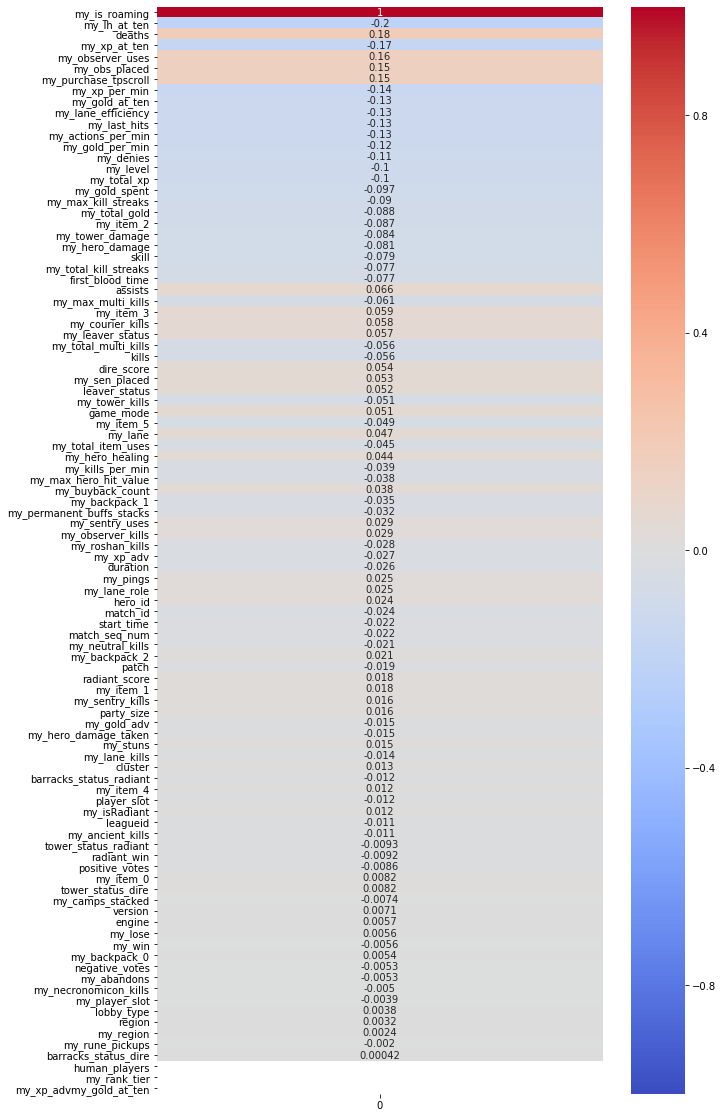

In [109]:
#alternative is to impute more
train = cleaned_df.copy()
correlations = train.corrwith(train['my_is_roaming']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

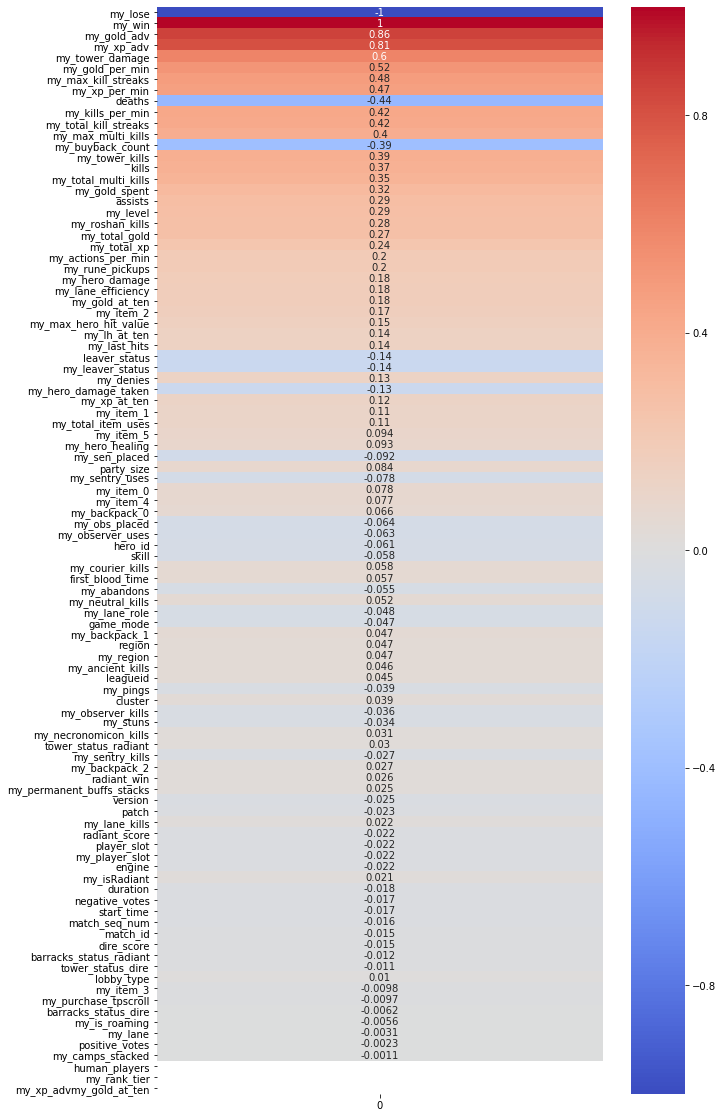

In [110]:

train = cleaned_df.copy()
correlations = train.corrwith(train['my_win']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);